<!---------------------- Introduction Section ------------------->
<h1> NumMobility: A Mobility Data PreProcessing Library </h1>

<h2> Introduction </h2>

<p align='justify'>
NumMobility is a state-of-the art Mobility Data Preprocessing Library that mainly deals with filtering data, generating features and interpolation of Trajectory Data.

<b><i> The main features of NumMobility are: </i></b>

<ol align='justify'>
<li> NumMobility uses primarily parallel computation based on
     python Pandas and numpy which makes it very fast as compared
     to other libraries available.
</li>

<li> NumMobility harnesses the full power of the machine that
     it is running on by using all the cores available in the
     computer.
</li>

<li> NumMobility uses a customized DataFrame built on top of python
     pandas for representation and storage of Trajectory Data.
</li>

<li> NumMobility also provides several Temporal and spatial features
     which are calculated mostly using parallel computation for very
     fast and accurate calculations.
</li>

<li> Moreover, NumMobility also provides several filteration and
     outlier detection methods for cleaning and noise reduction of
     the Trajectory Data.
</li>

<li> Apart from the features mentioned above, <i><b> four </b></i>
     different kinds of Trajectory Interpolation techniques are
     offered by NumMobility which is a first in the community.
</li>
</ol>
</p>

<!----------------- Dataset Link Section --------------------->
<hr style="height:6px;background-color:black">

<p align='justify'>
In the introduction of the library, the seagulls dataset is used
which can be downloaded from the link below: <br>
<span> &#8618; </span>
<a href="https://github.com/YakshHaranwala/NumMobility/blob/main/examples/data/gulls.csv" target='_blank'> Seagulls Dataset </a>
</p>

<!----------------- NbViewer Link ---------------------------->
<hr style="height:6px;background-color:black">
<p align='justify'>
Note: Viewing this notebook in GitHub will not render JavaScript
elements. Hence, for a better experience, click the link below
to open the Jupyter notebook in NB viewer.

<span> &#8618; </span>
<a href="https://nbviewer.jupyter.org/github/YakshHaranwala/NumMobility/blob/main/examples/0.%20Intro%20to%20NumMobility.ipynb" target='_blank'> Click Here </a>
</p>

<!------------------------- Documentation Link ----------------->
<hr style="height:6px;background-color:black">
<p align='justify'>
The Link to NumMobility's Documentation is: <br>

<span> &#8618; </span>
<a href='https://nummobility.readthedocs.io/en/latest/' target='_blank'> <i> NumMobility Documentation </i> </a>
<hr style="height:6px;background-color:black">
</p>

<h2> Importing Trajectory Data into a NumPandasTraj Dataframe </h2>

<p align='justify'>
NumMobility Library stores Mobility Data (Trajectories) in a specialised
pandas Dataframe structure called NumPandasTraj. As a result, the following
constraints are enforced for the data to be able to be stores in a NumPandasTraj.

<ol align='justify'>
   <li>
        Firstly, for a mobility dataset to be able to work with NumMobility Library needs
        to have the following mandatory columns present:
       <ul type='square'>
           <li> DateTime </li>
           <li> Trajectory ID </li>
           <li> Latitude </li>
           <li> Longitude </li>
       </ul>
   </li>
   <li>
       Secondly, NumPandasTraj has a very specific constraint for the index of the
       dataframes, the Library enforces a multi-index consisting of the
       <b><i> Trajectory ID, DateTime </i></b> columns because the operations of the
       library are dependent on the 2 columns. As a result, it is recommended
       to not change the index and keep the multi-index of <b><i> Trajectory ID, DateTime </i></b>
       at all times.
   </li>
   <li>
        Note that since NumPandasTraj Dataframe is built on top of
        python pandas, it does not have any restrictions on the number
        of columns that the dataset has. The only requirement is that
        the dataset should atleast contain the above mentioned four columns.
   </li>
</ol>
</p>

<hr style="height:6px;background-color:black">

In [21]:
"""
    METHOD - I:
        1. Enter the trajectory data into a list.
        2. Then, convert the list into a NumPandasTraj
           Dataframe to be used with NumMobility Library.
"""
import pandas as pd
from Nummobility.core.TrajectoryDF import NumPandasTraj

list_data = [
    [39.984094, 116.319236, '2008-10-23 05:53:05', 1],
    [39.984198, 116.319322, '2008-10-23 05:53:06', 1],
    [39.984224, 116.319402, '2008-10-23 05:53:11', 1],
    [39.984224, 116.319404, '2008-10-23 05:53:11', 1],
    [39.984224, 116.568956, '2008-10-23 05:53:11', 1],
    [39.984224, 116.568956, '2008-10-23 05:53:11', 1]
]
list_df = NumPandasTraj(data_set=list_data,
                        latitude='lat',
                        longitude='lon',
                        datetime='datetime',
                        traj_id='id')
print(f"The dimensions of the dataframe:{list_df.shape}")
print(f"Type of the dataframe: {type(list_df)}")

The dimensions of the dataframe:(6, 2)
Type of the dataframe: <class 'Nummobility.core.TrajectoryDF.NumPandasTraj'>


In [22]:
"""
    METHOD - II:
        1. Enter the trajectory data into a dictionary.
        2. Then, convert the dictionary into a NumPandasTraj
           Dataframe to be used with NumMobility Library.
"""
dict_data = {
    'lat': [39.984198, 39.984224, 39.984094, 40.98, 41.256],
    'lon': [116.319402, 116.319322, 116.319402, 116.3589, 117],
    'datetime': ['2008-10-23 05:53:11', '2008-10-23 05:53:06', '2008-10-23 05:53:30', '2008-10-23 05:54:06', '2008-10-23 05:59:06'],
    'id' : [1, 1, 1, 3, 3],
}
dict_df = NumPandasTraj(data_set=dict_data,
                        latitude='lat',
                        longitude='lon',
                        datetime='datetime',
                        traj_id='id')
print(f"The dimensions of the dataframe:{dict_df.shape}")
print(f"Type of the dataframe: {type(dict_df)}")

The dimensions of the dataframe:(5, 2)
Type of the dataframe: <class 'Nummobility.core.TrajectoryDF.NumPandasTraj'>


In [23]:
# Now, printing the head of the dataframe with data
# imported from a list.
list_df.head()

lat         lon
traj_id DateTime                                  
1       2008-10-23 05:53:05  39.984094  116.319236
        2008-10-23 05:53:06  39.984198  116.319322
        2008-10-23 05:53:11  39.984224  116.319402
        2008-10-23 05:53:11  39.984224  116.319404
        2008-10-23 05:53:11  39.984224  116.568956

In [24]:
# Now, printing the head of the dataframe with data
# imported from a dictionary.
dict_df.head()

lat         lon
traj_id DateTime                                  
1       2008-10-23 05:53:06  39.984224  116.319322
        2008-10-23 05:53:11  39.984198  116.319402
        2008-10-23 05:53:30  39.984094  116.319402
3       2008-10-23 05:54:06  40.980000  116.358900
        2008-10-23 05:59:06  41.256000  117.000000

In [25]:
"""
    METHOD - III:
        1. First, import the seagulls dataset from the csv file
           using pandas into a pandas dataframe.
        2. Then, convert the pandas dataframe into a NumPandasTraj
           DataFrame to be used with NumMobility library.
"""
df = pd.read_csv('./data/gulls.csv')
seagulls_df = NumPandasTraj(data_set=df,
                            latitude='location-lat',
                            longitude='location-long',
                            datetime='timestamp',
                            traj_id='tag-local-identifier',
                            rest_of_columns=[])
print(f"The dimensions of the dataframe:{seagulls_df.shape}")
print(f"Type of the dataframe: {type(seagulls_df)}")

The dimensions of the dataframe:(89869, 8)
Type of the dataframe: <class 'Nummobility.core.TrajectoryDF.NumPandasTraj'>


In [26]:
# Now, print the head of the seagulls_df dataframe.
seagulls_df.head()

event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  
traj_id DateTime                                                                
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...

<h1> Kinematic Trajectory Features </h1>

<p align='justify'>
As mentioned above, NumMobility offers a multitude of features
which are calculated based on both Datetime, and the coordinates
of the points given in the data. Both the feature module are named
as follows:
</p>

<ul align='justify'>
    <li> temporal_features (based on DateTime) </li>
    <li> spatial_features (based on geographical coordinates) </li>
</ul>
<hr style="background-color:black; height:7px">

<h2> NumMobility Temporal Features </h2>

<p align='justify'>

The following steps are performed to demonstrate the usage of
Temporal features present in NumMobility:

<ul type='square', align='justify'>
<li>Various features Date, Time, Week-day, Time of Day etc are
    calculated using temporal_features.py module functions and
    the results are appended to the original dataframe.
</li>
<li> Not all the functions present in the module are demonstrated
     here. Only a few of the functions are demonstrated here, keeping
     the length of jupyter notebook in mind. Further functions can
     be explored in the documentation of the library. The documentation
     link is provided in the introduction section of this notebook.
</li>
</ul>
</p>

In [27]:
%%time

"""
    To demonstrate the temporal features, we will:
        1. First, import the temporal_features.py module from the
           features package.
        2. Generate Date, Day_Of_Week, Time_Of_day features on
           the seagulls dataset.
        3. Print the execution time of the code.
        4. Finally, check the head of the dataframe to
           see the results of feature generation.
"""
from Nummobility.features.temporal_features import TemporalFeatures as temporal

temporal_features_df = temporal.create_date_column(seagulls_df)
temporal_features_df = temporal.create_day_of_week_column(temporal_features_df)
temporal_features_df = temporal.create_time_of_day_column(temporal_features_df)
temporal_features_df.head()

CPU times: user 384 ms, sys: 16.5 ms, total: 400 ms
Wall time: 398 ms


event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  \
traj_id DateTime                                                                 
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...   
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...   
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...   
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...   
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...   

                                   Date Day_Of_Week    Time_Of_Day  
traj_id DateTime                                                    
91732   2009-05-27 14:00:00  2009-05-27   Wednesday           Noon  
        2009-05-27 20:00:00  2009-05-27   Wednesday        Evening  
        2009-05-28 05:00:00  2009-05-28    Thursday  Early Morning  
        2009-05-28 08:00:00  2009-05-28    Thursday  Early Morning  
        2009-05-28 14:00:00  2009-05-28    Thursday           Noon

<h2> NumMobility Spatial Features </h2>

<p align='justify'>

The following steps are performed to demonstrate the usage of
Spatial features present in NumMobility:
</p>
<ul type='square', align='justify'>
<li>Various features like Distance, Jerk and rate of bearing rate are
    calculated using spatial_features.py module functions and
    the results are appended to the original dataframe.
</li>
<li> While calculating jerk, the columns of acceleration, speed and
     distance all are added to the dataframe. Similarly, when calculating
     rate of bearing rate, the column of Bearing and Bearing rate are
     added to the dataframe.
</li>
<li> Not all the functions present in the module are demonstrated
     here. Only a few of the functions are demonstrated here, keeping
     the length of jupyter notebook in mind. Further functions can
     be explored in the documentation of the library. The documentation
     link is provided in the introduction section of this notebook.
</li>
</ul>

In [28]:
%%time

"""
    To demonstrate the spatial features, we will:
        1. First, import the spatial_features.py module from the
           features package.
        2. Calculate Distance, Jerk and Rate of bearing rate features on
           the seagulls dataset.
        3. Print the execution time of the code.
        4. Finally, check the head of the dataframe to
           see the results of feature generation.
"""

from Nummobility.features.spatial_features import SpatialFeatures as spatial

spatial_features_df = spatial.create_distance_between_consecutive_column(seagulls_df)
spatial_features_df = spatial.create_jerk_from_prev_column(spatial_features_df)
spatial_features_df = spatial.create_rate_of_bearing_rate_column(spatial_features_df)
spatial_features_df.head()

CPU times: user 590 ms, sys: 182 ms, total: 772 ms
Wall time: 1.37 s


event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  \
traj_id DateTime                                                                 
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...   
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...   
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...   
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...   
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...   

                             Distance_prev_to_curr  Speed_prev_to_curr  \
traj_id DateTime                                                         
91732   2009-05-27 14:00:00                    NaN                 NaN   
        2009-05-27 20:00:00            1699.244398            0.078669   
        2009-05-28 05:00:00            5632.120064            0.173831   
        2009-05-28 08:00:00            5643.314949            0.522529   
        2009-05-28 14:00:00              32.131494            0.001488   

                             Acceleration_prev_to_curr  jerk_prev_to_curr  \
traj_id DateTime                                                            
91732   2009-05-27 14:00:00                        NaN                NaN   
        2009-05-27 20:00:00                        NaN                NaN   
        2009-05-28 05:00:00                   0.000003                NaN   
        2009-05-28 08:00:00                   0.000032       2.717572e-09   
        2009-05-28 14:00:00                  -0.000024      -2.611536e-09   

                             Bearing_between_consecutive  \
traj_id DateTime                                           
91732   2009-05-27 14:00:00                          NaN   
        2009-05-27 20:00:00                   187.236713   
        2009-05-28 05:00:00                   208.929407   
        2009-05-28 08:00:00                    28.716637   
        2009-05-28 14:00:00                   123.620959   

                             Bearing_rate_from_prev  \
traj_id DateTime                                      
91732   2009-05-27 14:00:00                     NaN   
        2009-05-27 20:00:00                     NaN   
        2009-05-28 05:00:00                0.000670   
        2009-05-28 08:00:00               -0.016686   
        2009-05-28 14:00:00                0.004394   

                             Rate_of_bearing_rate_from_prev  
traj_id DateTime                                             
91732   2009-05-27 14

<h1> Trajectory Data Preprocessing </h1>

<p align = 'justify'>
In the form of preprocessing NumMobility provides:
</p>
<ul align = 'justify'>
<li> Outlier Detection </li>
<li> Data filtering based on various constraints </li>
<li> Trajectory Interpolation </li>
</ul>
<p> For interpolation the user needs to provide the type of interpolation. </p>

<hr style="background-color:black; height:7px">

<h2> Outlier Detection and Data Filtering </h2>

<p> NumMobility provides several outlier detection method based on: </p>
<ul align='justify'>
<li>Distance</li>
<li> Speed </li>
<li> Trajectory length </li>
<li> Hampel filter algorithm </li>
</ul>
<p> It also provides several filtering methods based on various constraints such as: </p>
<ul type = 'square' align='justify'>
<li> Date </li>
<li> Speed </li>
<li> Distance, etc. </li>
</ul>
<p align = 'justify'> Not all the functions present in the module are demonstrated
     here. Only a few of the functions are demonstrated here, keeping
     the length of jupyter notebook in mind. Further functions can
     be explored in the documentation of the library. The documentation
     link is provided in the introduction section of this notebook.
</p>

In [29]:
%%time

"""
    To demonstrate the spatial features, we will:
        1. First, import the filters.py module from the
           preprocessing package.
        2. Detect outliers and Filter out data based on 
            bounding box, date and distance.
        3. Print the execution time of the code.
"""
from Nummobility.preprocessing.filters import Filters as filt

# Makes use of hampel filter from preprocessing package for outlier removal
outlier_df = filt.hampel_outlier_detection(seagulls_df, column_name='lat')
print(f"Length of original: {len(seagulls_df)}")
print(f"Length after outlier removal: {len(outlier_df)}")
print(f"Number of points removed: {len(seagulls_df) - len(outlier_df)}")

Length of original: 89869
Length after outlier removal: 74765
Number of points removed: 15104
CPU times: user 225 ms, sys: 99.6 ms, total: 324 ms
Wall time: 9.6 s


In [30]:
%%time

# Filters and gives out data contained within the given bounding box
filter_df_bbox = filt.filter_by_bounding_box(seagulls_df, (61, 24, 65, 25))
print(f"Length of original: {len(seagulls_df)}")
print(f"Length of data in the bounding box: {len(filter_df_bbox)}")
print(f"Number of points removed: {len(seagulls_df) - len(filter_df_bbox)}")


Length of original: 89869
Length of data in the bounding box: 10178
Number of points removed: 79691
CPU times: user 23.1 ms, sys: 0 ns, total: 23.1 ms
Wall time: 21.1 ms


In [31]:
%%time

# Gives out the points contained within the given date range
filter_df_date = filt.filter_by_date(temporal_features_df, start_date='2009-05-28', end_date='2009-06-30')
print(f"Length of original: {len(temporal_features_df)}")
print(f"Length of data within specified date: {len(filter_df_date)}")
print(f"Number of points removed: {len(temporal_features_df) - len(filter_df_date)}")

Length of original: 89869
Length of data within specified date: 2692
Number of points removed: 87177
CPU times: user 71.7 ms, sys: 22.8 ms, total: 94.5 ms
Wall time: 92.8 ms


In [32]:
%%time

# Filtered dataset with a given maximum distance 
filter_df_distance = filt.filter_by_max_consecutive_distance(spatial_features_df, max_distance=4500)
print(f"Length of original: {len(spatial_features_df)}")
print(f"Length of Max distance Filtered DF: {len(filter_df_distance)}")
print(f"Number of points removed: {len(spatial_features_df) - len(filter_df_distance)}")


Length of original: 89869
Length of Max distance Filtered DF: 47750
Number of points removed: 42119
CPU times: user 64.6 ms, sys: 4.09 ms, total: 68.7 ms
Wall time: 66.8 ms


<h2> Trajectory Interpolation </h2>

<p align='justify'>
As mentioned above, for the first time in the community, NumMobility
offers <b><i> four different Interpolation Techniques </i></b> built
into it.

Trajectory Interpolation is widely used when the trajectory data
on hand is not clean and has several Jumps in it which makes the
trajectory abrupt. Using interpolation techniques, those jumps
between the trajectory points can be filled in order to make the
trajectory smoother.

NumMobility offers  following four interpolation techniques:
</p>
<ol align='justify'>
<i>
<li> Linear Interpolation </li>
<li> Cubic Interpolation </li>
<li> Random-Walk Interpolation </li>
<li> Kinematic Interpolation </li>
</i>
</ol>

In the examples of interpolation provided in this notebook, the
examples are demonstrated on a single trajectory selected from the
seagulls dataset. However, it is to be noted that the interpolation
works equally well on datasets containing several trajectories.

<h3> Note </h3>
<p align='justify'>
Furthermore, it is also worthwhile to note that NumMobility only
interpolates 4 fundamental columns i.e., <i><b> Latitude, Longitude,
DateTime and Trajectory ID </b></i>. Hence, the dataframe returned
by the interpolation methods only contain the above mentioned 4
columns. This decision is taken while keeping the following point
in mind that it is not possible to interpolate other kinds of
data that may or may not be present in the dataset.
</p>

In [33]:
"""
    First, the following operations are performed:
        1. Import the necessary interpolation modules
           from the preprocessing package.
        2. Select a single trajectory ID from the seagulls
           dataset and then plot it using folium.
        3. The number of points having time jump greater than
           4 hours between 2 points is also calculated and shown.
"""
import Nummobility.utilities.constants as const
import folium
from Nummobility.preprocessing.interpolation import Interpolation as ip

small_seagulls = seagulls_df.reset_index().loc[seagulls_df.reset_index()[const.TRAJECTORY_ID] == '91732'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
time_del = small_seagulls.reset_index()[const.DateTime].diff().dt.total_seconds()
print((time_del > 3600*4).value_counts())

True     1501
False     469
Name: DateTime, dtype: int64


In [34]:
# Here, we plot the smaller trajectory on a folium map.
sw = small_seagulls[['lat', 'lon']].min().values.tolist()
ne = small_seagulls[['lat', 'lon']].max().values.tolist()
coords = [zip(small_seagulls[const.LAT], small_seagulls[const.LONG])]
m1 = folium.Map(location=[small_seagulls[const.LAT].iloc[0], small_seagulls[const.LONG].iloc[0]], zoom_start=1000)

folium.PolyLine(coords,
                color='blue',
                weight=2,
                opacity=0.7).add_to(m1)
m1.fit_bounds([sw, ne])
m1

In [35]:
%%time

"""
    Now, to demonstrate interpolation, the following steps
    are taken:
        1. Interpolate the selected trajectory using all of
           the above mentioned techniques and print their
           execution times along with them.
        2. Then, plot all the trajectories side by side along
           with the original trajectory on a scatter plot to
           see how the time jumps are filled and the points
           are inserted into the trajectory.
"""

# First, linear interpolation is performed.
linear_ip_gulls = ip.interpolate_position(dataframe=small_seagulls,
                                          time_jump=3600*4,
                                          ip_type='linear')
print(f"Original DF Length: {len(small_seagulls)}")
print(f"Interpolated DF Length: {len(linear_ip_gulls)}")

Original DF Length: 1970
Interpolated DF Length: 3471
CPU times: user 21.7 ms, sys: 20.2 ms, total: 41.9 ms
Wall time: 5.93 s


In [36]:
%%time
# Now, cubic interpolation is performed.
cubic_ip_gulls = ip.interpolate_position(dataframe=small_seagulls,
                                         time_jump=3600*4,
                                         ip_type='cubic')
print(f"Original DF Length: {len(small_seagulls)}")
print(f"Interpolated DF Length: {len(cubic_ip_gulls)}")

Original DF Length: 1970
Interpolated DF Length: 3471
CPU times: user 26.1 ms, sys: 15.7 ms, total: 41.7 ms
Wall time: 5.91 s


In [37]:
%%time
# Now, random-walk interpolation is performed.
rw_ip_gulls = ip.interpolate_position(dataframe=small_seagulls,
                                      time_jump=3600*4,
                                      ip_type='random-walk')
print(f"Original DF Length: {len(small_seagulls)}")
print(f"Interpolated DF Length: {len(rw_ip_gulls)}")

Original DF Length: 1970
Interpolated DF Length: 3471
CPU times: user 29.3 ms, sys: 12.2 ms, total: 41.5 ms
Wall time: 6.09 s


In [38]:
%%time
# Now, kinematic interpolation is performed.
kin_ip_gulls = ip.interpolate_position(dataframe=small_seagulls,
                                       time_jump=3600*4,
                                       ip_type='kinematic')
print(f"Original DF Length: {len(small_seagulls)}")
print(f"Interpolated DF Length: {len(kin_ip_gulls)}")

Original DF Length: 1970
Interpolated DF Length: 3470
CPU times: user 17.7 ms, sys: 24.9 ms, total: 42.5 ms
Wall time: 6.71 s


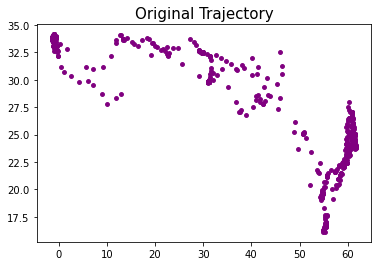

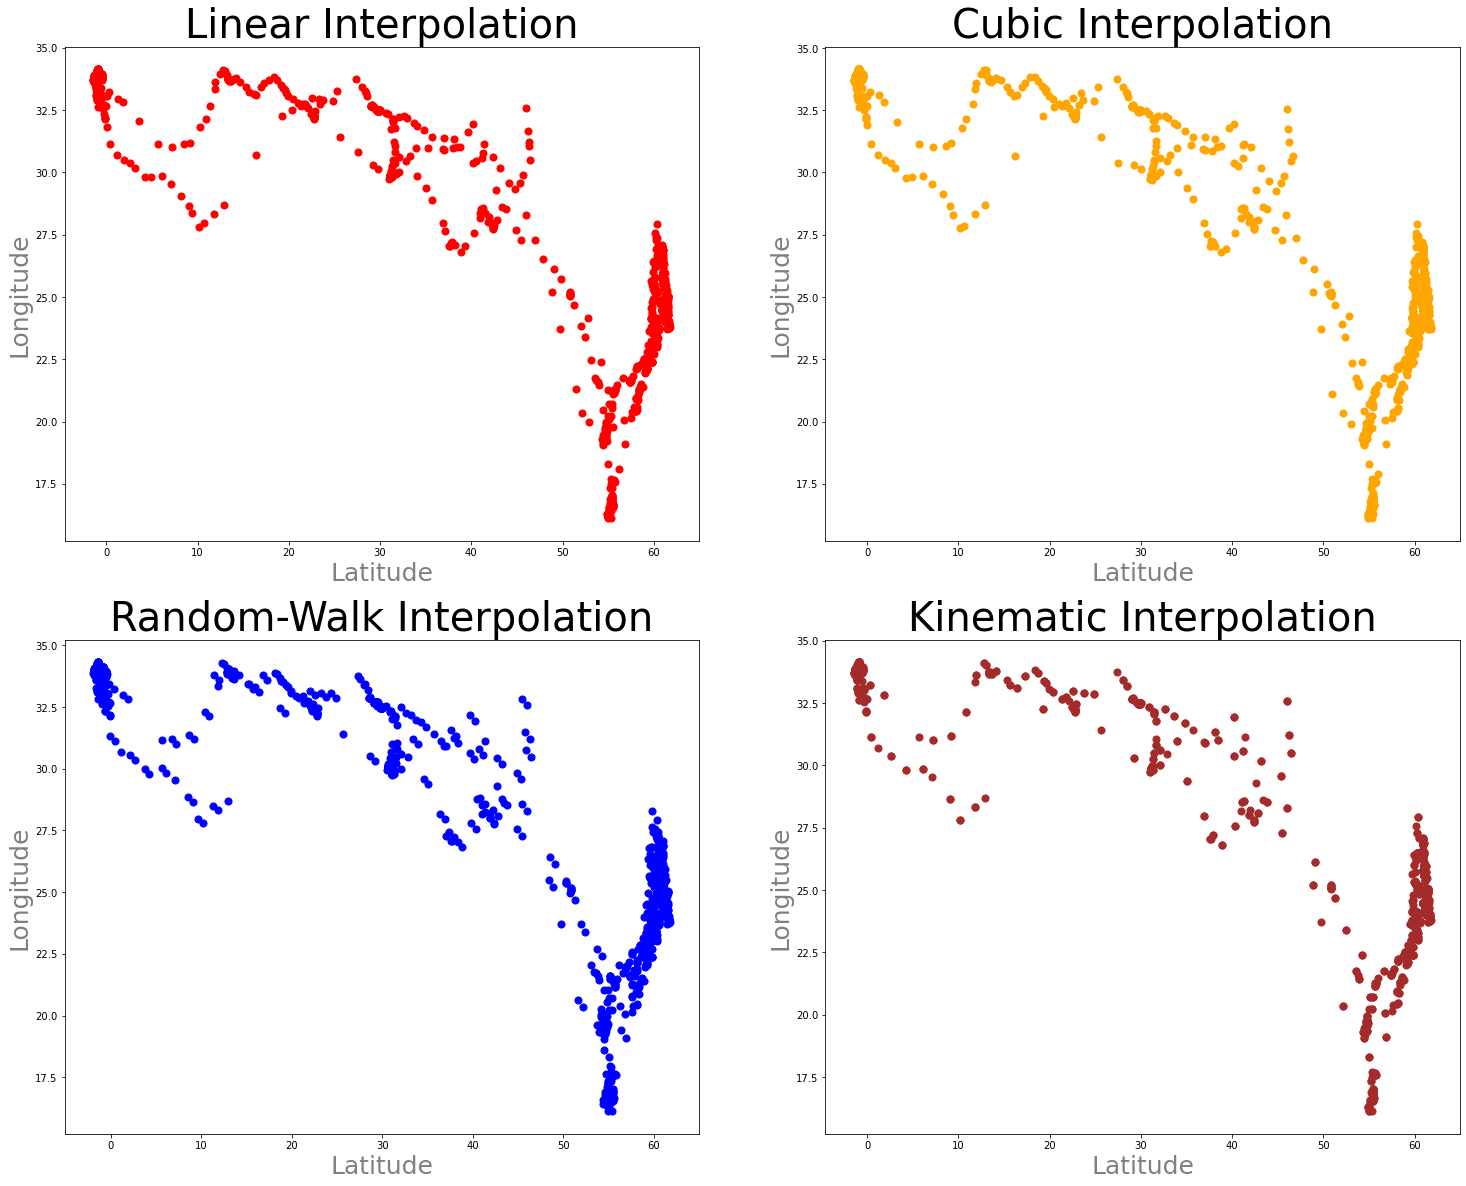

In [39]:
"""
    Now, plotting all the scatter plots side by side
    in order to compare the interpolation techniques.
"""
import matplotlib.pyplot as plt


plt.scatter(small_seagulls[const.LAT],
            small_seagulls[const.LONG],
            s=15, color='purple')
plt.title('Original Trajectory', color='black', size=15)
plt.show()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25, 20))

ax[0, 0].scatter(linear_ip_gulls[const.LAT],
                 linear_ip_gulls[const.LONG],
                 s=50, color='red')
ax[0, 0].set_title('Linear Interpolation', color='black', size=40)
ax[0, 1].scatter(cubic_ip_gulls[const.LAT],
                 cubic_ip_gulls[const.LONG],
                 s=50, color='orange')
ax[0, 1].set_title('Cubic Interpolation', color='black', size=40)
ax[1, 0].scatter(rw_ip_gulls[const.LAT],
                 rw_ip_gulls[const.LONG],
                 s=50, color='blue')
ax[1, 0].set_title('Random-Walk Interpolation', color='black', size=40)
ax[1, 1].scatter(kin_ip_gulls[const.LAT],
                 kin_ip_gulls[const.LONG],
                 s=50, color='brown')
ax[1, 1].set_title('Kinematic Interpolation', color='black', size=40)

for plot in enumerate(ax.flat):
    plot[1].set_xlabel('Latitude', color='grey', size=25)
    plot[1].set_ylabel('Longitude', color='grey', size=25)
